In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the CNN model with hyperparameter tuning
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Increased filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) # Increased units
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model with fine-tuned hyperparameters
optimizer = Adam(learning_rate=0.001) # Adjusted learning rate
model.compile(optimizer=optimizer,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3,
restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [ ]:
# Train the CNN model with fine-tuned hyperparameters
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
validation_data=(test_images, test_labels),
callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
938/938 [==============================] - 58s 61ms/step - loss: 0.2229 - accuracy: 0.9328 - val_loss: 0.0722 - val_accuracy: 0.9787
Epoch 2/20
  3/938 [..............................] - ETA: 40s - loss: 0.0495 - accuracy: 0.9844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 47s 50ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0648 - val_accuracy: 0.9790
Epoch 3/20
938/938 [==============================] - 48s 51ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 4/20
938/938 [==============================] - 47s 50ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0600 - val_accuracy: 0.9824
Epoch 5/20
938/938 [==============================] - 47s 50ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0578 - val_accuracy: 0.9832
Epoch 6/20
938/938 [==============================] - 49s 52ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0507 - val_accuracy: 0.9864
Epoch 7/20
938/938 [==============================] - 48s 51ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0643 - val_accuracy: 0.9827
Epoch 8/20
938/938 [==============================] - 46s 49ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0532 - val_accuracy: 0.9847
Epo

In [ ]:
# Load the best model from the checkpoint
best_model = models.load_model('best_model.h5')

In [ ]:
# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f'Test accuracy of the best model: {test_acc}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0507 - accuracy: 0.9864
Test accuracy of the best model: 0.9864000082015991


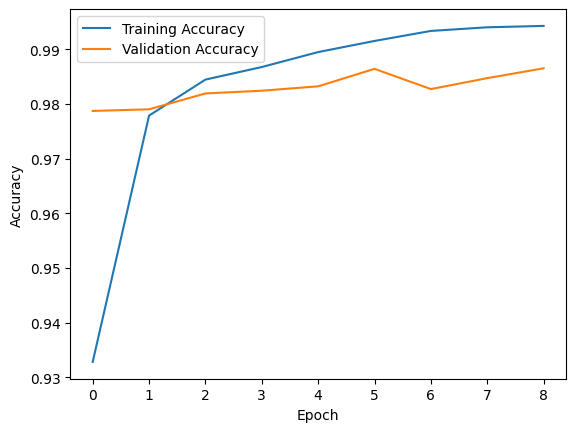

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()